In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pitcher = pd.read_csv('pitching.csv')
player = pd.read_csv('players.csv')
team = pd.read_csv('teams.csv')

In [2]:
# 1. Compute the total number of wins for each of the teams in MLB over 2011-2015, sort them in a descending order.
tm = team[(team['yearID'] >= 2011) & (team['yearID'] < 2016)].copy()
tm = pd.DataFrame(tm.groupby('teamID')['W'].sum()).sort_values('W', ascending=False)
tm

,W
teamID,
SLN,465
NYA,448
LAN,446
WAS,443
DET,440
LAA,436
TEX,435
PIT,431
TBA,430


In [3]:
# 2. Compute the average payroll per year for all teams over 2011-2015, sort them in a descending order.
plyr = player[(player['yearID'] >= 2011) & (player['yearID'] < 2016)].copy()
plyr = pd.DataFrame(plyr.groupby('teamID')['salary'].mean()).sort_values('salary', ascending=False)
plyr

,salary
teamID,
NYA,7.638713e+06
PHI,5.721195e+06
LAN,5.642426e+06
DET,5.513730e+06
BOS,5.184631e+06
SFN,5.056022e+06
LAA,4.835898e+06
TEX,4.265301e+06
CHA,4.114336e+06


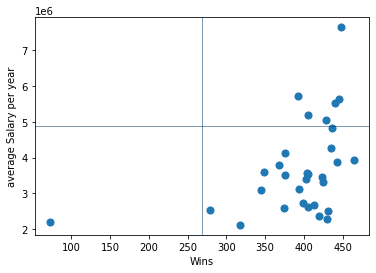

In [4]:
# 3. Create a visualization of your choice which will all allow you to show whether a team’s winningrecord is related to its payroll. So is a team’s winning record related to its payroll?
res = pd.merge(tm, plyr, on='teamID')
plt.scatter(res['W'], res['salary'], s=50)
plt.xlabel('Wins')
plt.ylabel('average Salary per year')
plt.axvline(x=(res['W'].min()+res['W'].max())/2, linewidth=1, color='#003865', alpha=0.5)
plt.axhline(y=(res['salary'].min()+res['salary'].max())/2, linewidth=1, color='#003865', alpha=0.5)
plt.show()

In [5]:
# 1. Compute the Batting Averages for each of the MLB teams over 2011-2015, sort them in a descending order. The Batting Average is defined as Hits/At Bats. The average is calculated from all players in each team.
plyr = player[(player['yearID'] >= 2011) & (player['yearID'] < 2016)].copy()
plyr['BA'] = plyr.apply(lambda x: x['H']/x['AB'] if x['AB'] is not 0 else None, axis=1)
plyr = pd.DataFrame(plyr.groupby('teamID')['BA'].mean()).sort_values('BA', ascending=False)
plyr

,BA
teamID,
CLE,0.221480
TEX,0.214438
DET,0.213173
LAA,0.209346
HOU,0.205487
WAS,0.205166
KCA,0.204030
CHA,0.202099
BOS,0.200775


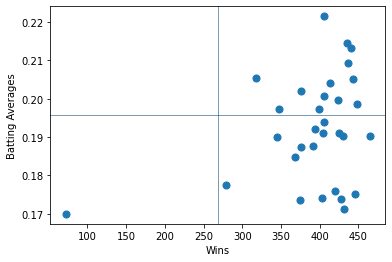

In [6]:
# 2. Create a visualization of your choice which will allow you to decide whether a team’s batting average is related to its win-loss record. So is a team’s winning record related to its batting average?
res = pd.merge(tm, plyr, on='teamID')
plt.scatter(res['W'], res['BA'], s=50)
plt.xlabel('Wins')
plt.ylabel('Batting Averages')
plt.axvline(x=(res['W'].min()+res['W'].max())/2, linewidth=1, color='#003865', alpha=0.5)
plt.axhline(y=(res['BA'].min()+res['BA'].max())/2, linewidth=1, color='#003865', alpha=0.5)
plt.show()

In [7]:
# 1. Display the average ERA (Earned Run Average) for each of the MLB teams in 2011-2015, sort them in a descending order. A lower ERA indicates a better pitching performance.
pitch = pitcher[(pitcher['yearID'] >= 2011) & (pitcher['yearID'] < 2016)].copy()
pitch = pd.DataFrame(pitch.groupby('teamID')['ERA'].mean()).sort_values('ERA', ascending=False)
pitch

,ERA
teamID,
TOR,6.277933
LAA,6.012016
NYN,5.886875
NYA,5.846667
COL,5.826370
DET,5.565317
CHN,5.385108
HOU,5.266063
PHI,5.153769


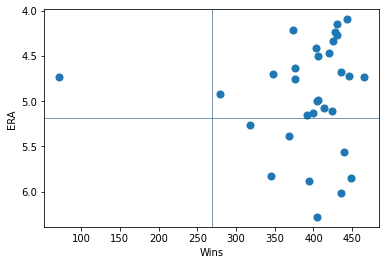

In [8]:
# 2. Create a visualization of your choice which will allow you to decide if a team’s win-loss record is related to its pitching performance. So is a team’s winning record related to its pitching performance?
res = pd.merge(tm, pitch, on='teamID')
plt.scatter(res['W'], res['ERA'], s=50)
plt.xlabel('Wins')
plt.ylabel('ERA')
plt.gca().invert_yaxis()
plt.axvline(x=(res['W'].min()+res['W'].max())/2, linewidth=1, color='#003865', alpha=0.5)
plt.axhline(y=(res['ERA'].min()+res['ERA'].max())/2, linewidth=1, color='#003865', alpha=0.5)
plt.show()